# UNIMIBOX

In [ ]:
import requests
from requests.auth import HTTPBasicAuth

r = requests.request(
    method="get",
    url="https://unimibox.unimi.it/remote.php/dav/files/Danilo_Deana/Shared/Fase%203/Stato prenotazioni.xlsx",
    auth=("danilo.deana", "2NHs4-WQFKz-cXcQ6-ZkSGT-KQ7Ny")
)

with open(r"tmp/Stato prenotazioni.xlsx", "wb") as f:
    f.write(r.content)

# Biblioteche

In [1]:
import pandas as pd

dfLBR = pd.read_csv("csv" + "/" + "biblioteche.csv", sep = "\t")

# Posti a dedere

In [2]:
import pandas as pd

df = pd.read_excel("tmp" + "/" + "Stato Prenotazioni.xlsx")

# Stato prenotazioni

In [25]:
anno = 2021

mese = 9

giorno_iniziale = 27

In [26]:
def etichetta(biblioteca):
    etichetta = biblioteca.replace(' ', '\n')
    if etichetta == 'Scienze\ndella\nTerra':
        etichetta = 'Scienze\ndella Terra'
    return etichetta

df['etichetta'] = df.apply(lambda x: etichetta(x['biblioteca']), axis = 1)

# Settimana

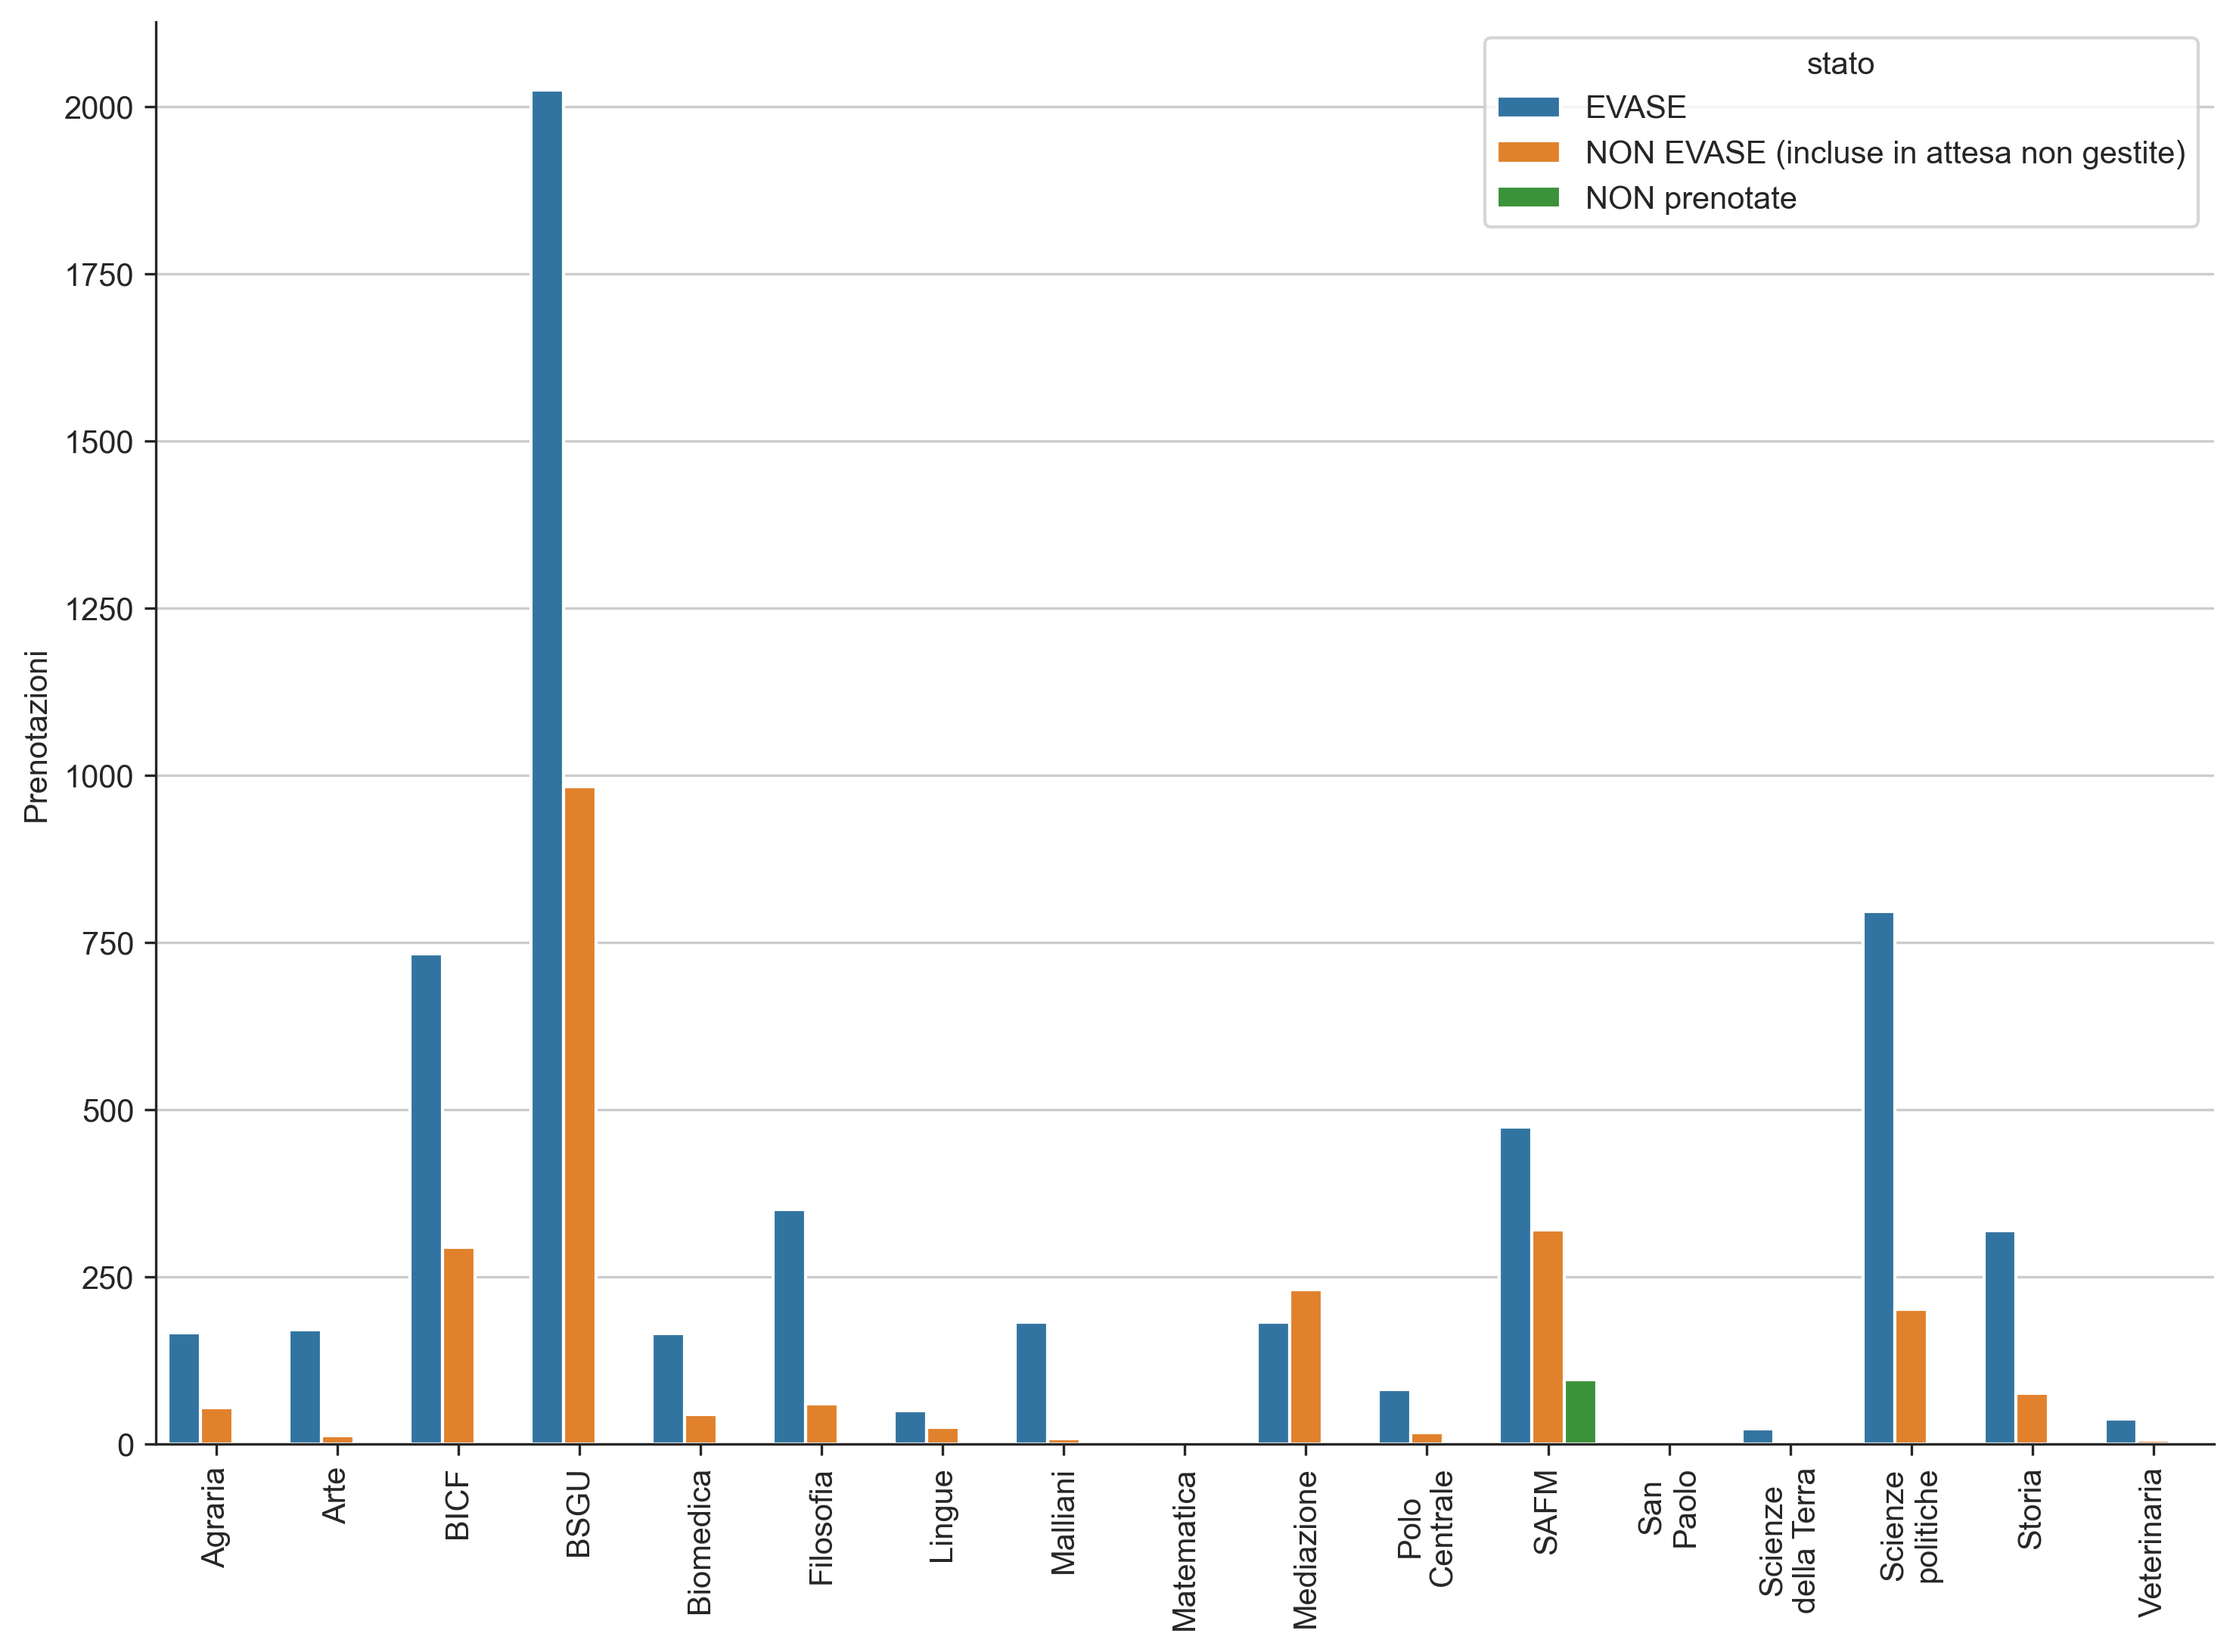

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")

sns.barplot(data = df[(df["anno"] == anno) & (df["mese"] == mese) & (df["giorno_iniziale"] == giorno_iniziale)],
    x = "etichetta", y = "prenotazioni" , hue = "stato")
sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Prenotazioni")
plt.savefig("immagini" + "/" + "Stato prenotazioni " + str(anno) + " " + str(mese) + " " + str(giorno_iniziale) + ".jpg",
    dpi = 300)
plt.show()

# Mese

In [23]:
def etichetta(biblioteca):
    etichetta = biblioteca.replace(' ', '\n')
    if etichetta == 'Scienze\ndella\nTerra':
        etichetta = 'Scienze\ndella Terra'
    return etichetta

s = df.groupby(['anno', 'mese', 'biblioteca', 'stato'])['prenotazioni'].sum()

dfTMP = s.to_frame(name = 'prenotazioni')

dfTMP.reset_index(inplace = True)

dfTMP['etichetta'] = dfTMP.apply(lambda x: etichetta(x['biblioteca']), axis = 1)

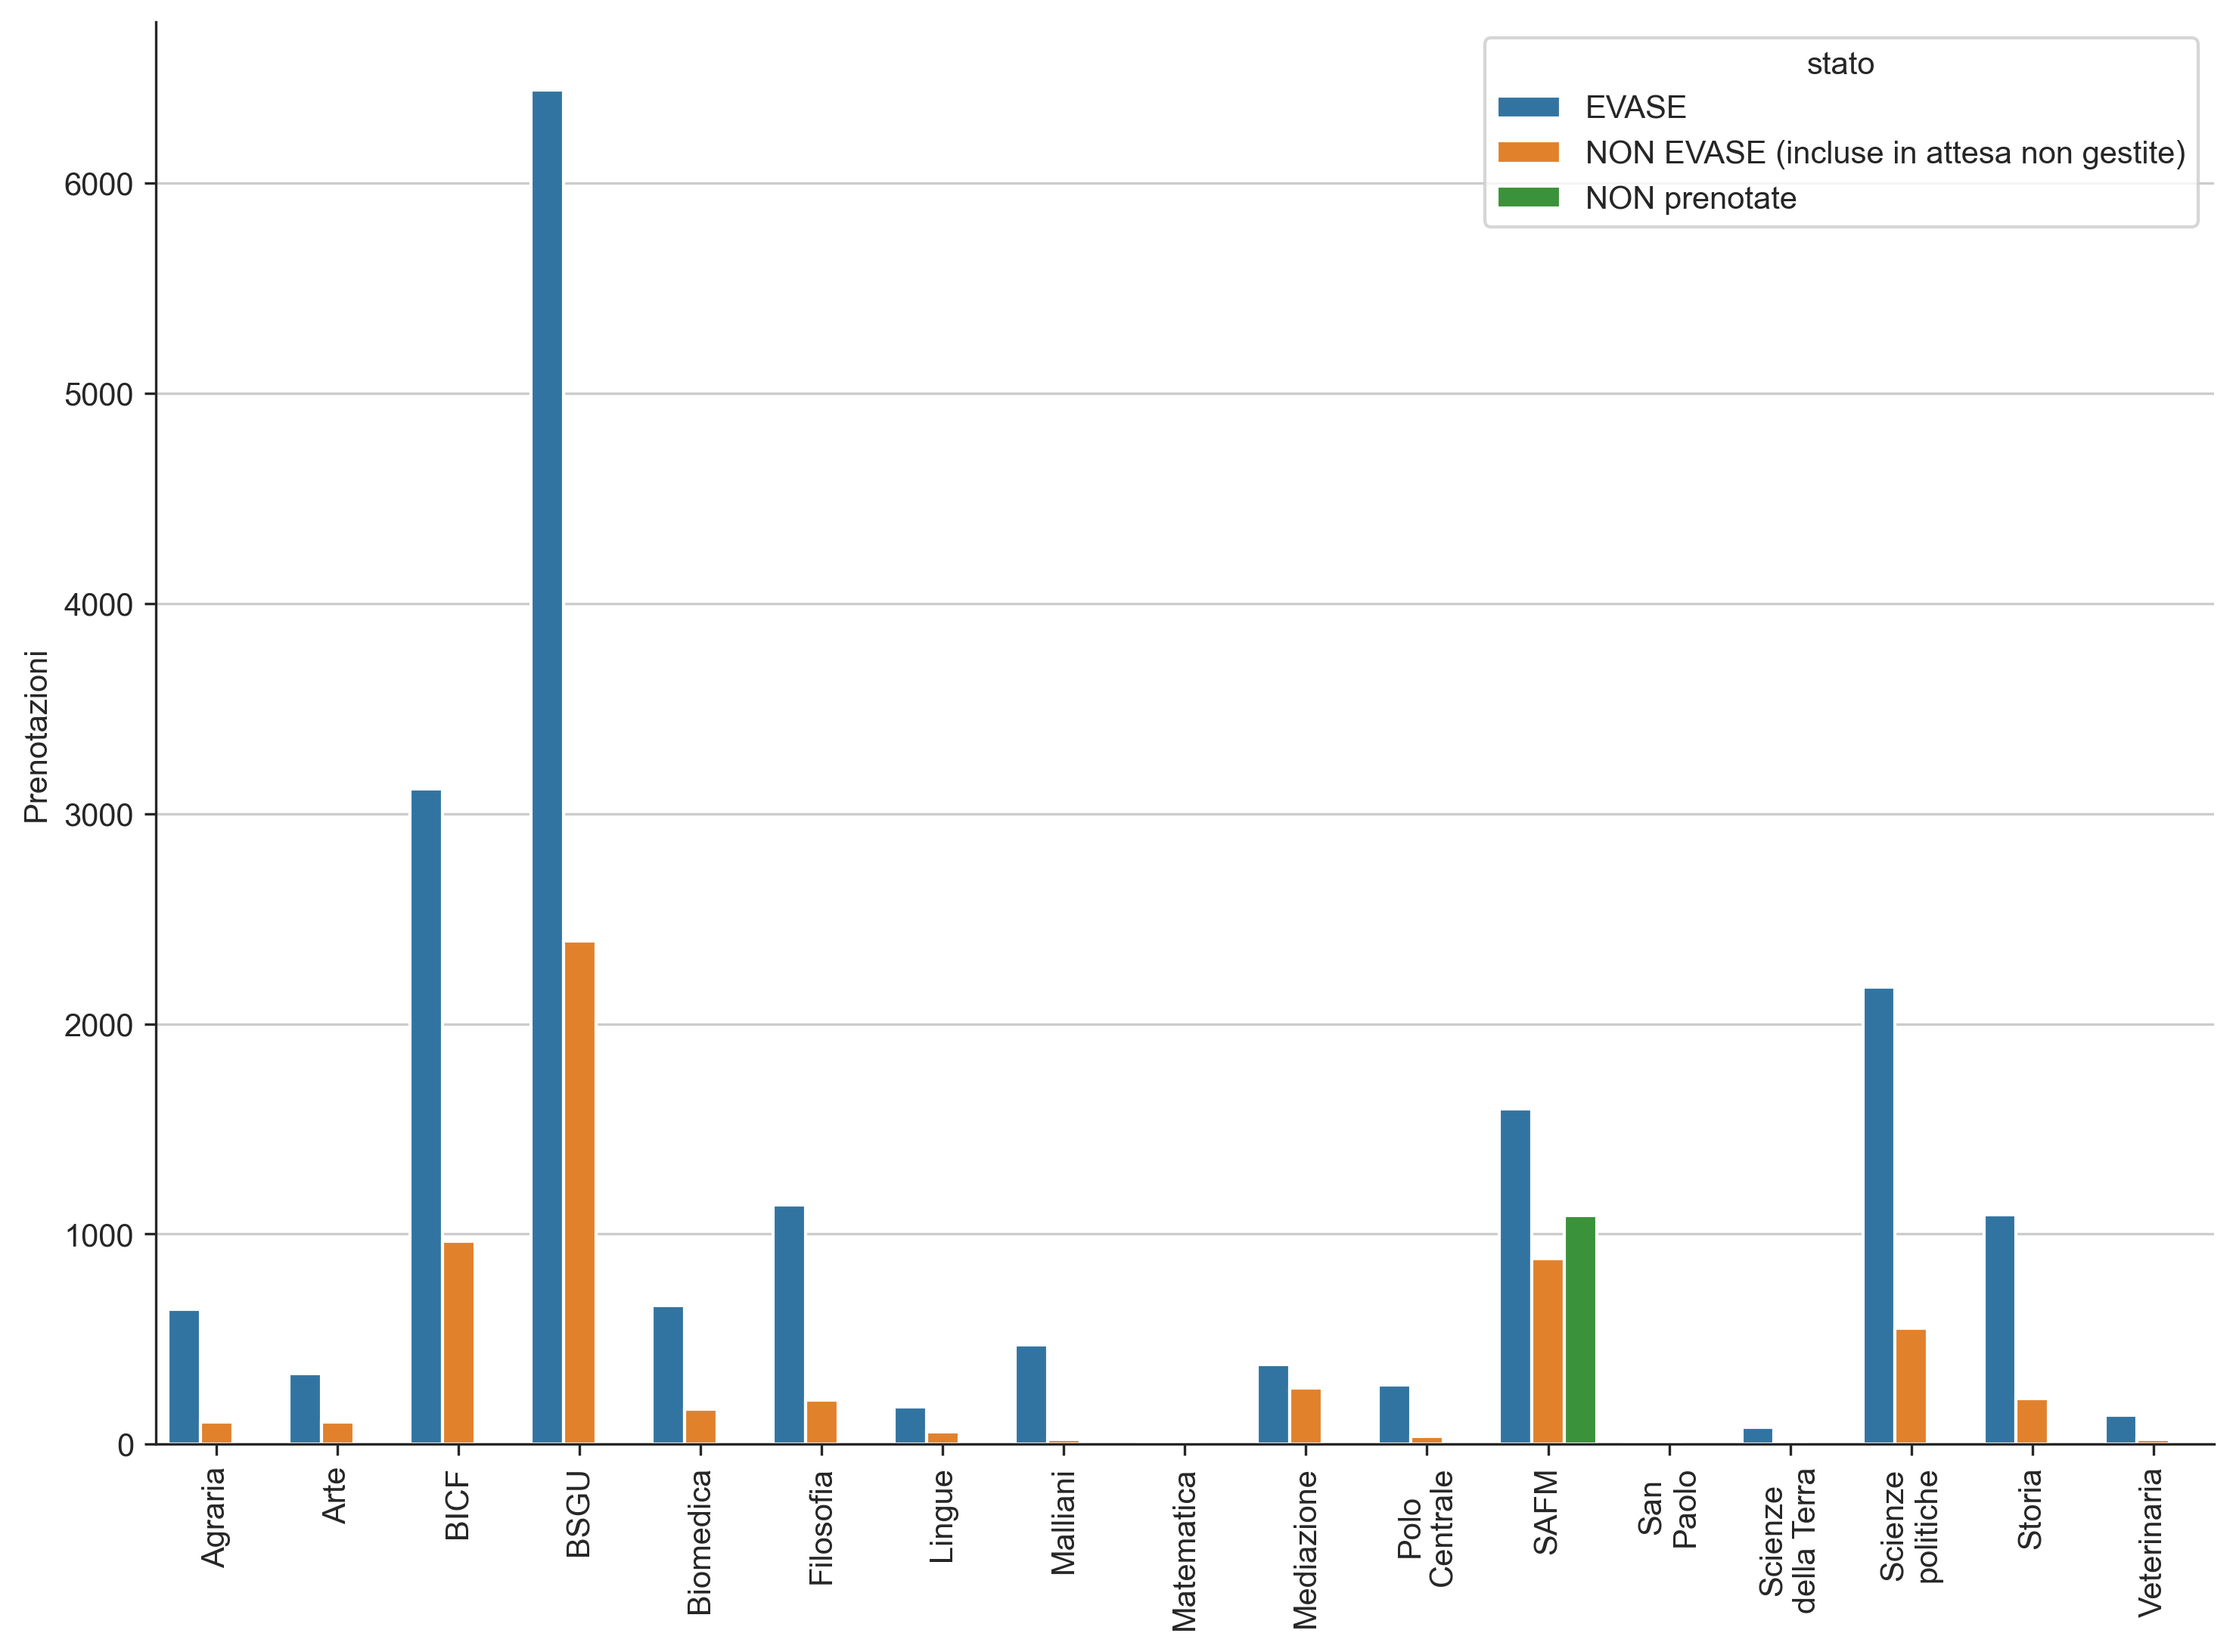

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (11.7, 8.3), dpi = 300)
sns.set_style("ticks")

sns.barplot(data = dfTMP[(dfTMP["anno"] == anno) & (dfTMP["mese"] == mese)],
    x = "etichetta", y = "prenotazioni" , hue = "stato")
sns.despine(right = True)
plt.grid(b = None, which = "both", axis = "y")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.ylabel("Prenotazioni")
plt.savefig("immagini" + "/" + "Stato prenotazioni " + str(anno) + " " + str(mese) + ".jpg",
    dpi = 300)
plt.show()

# Tabella

In [5]:
df[(df["anno"] == anno) & (df["mese"] == mese) & (df["giorno_iniziale"] == giorno_iniziale)].to_excel("xlsx" + "/" + "Stato prenotazioni " + str(anno) + " " + str(mese) + " " + str(giorno_iniziale) + ".xlsx")